# Implement NF from scratch

Let's denote the random variable following the target bimodal distribution as $X$, and the random variable following the base distribution (standard normal) as $Z$. Our target distribution is $p_X(x)$, which in our example is the bimodal distribution created by mixing two normal distributions. Our base distribution is $p_Z(z)$, which is the standard normal distribution $N(0,1)$.

We want to find an invertible transformation $f$ such that $X=f(Z)$, and its inverse function $f^{-1}$ such that $Z=f^{-1}(X)$. For this simple example, we'll use an affine transformation as $f$ : $f(z)=a z+b$ where $a$ and $b$ are learnable parameters. The inverse of this transformation is:
$$
z=f^{-1}(x)=\frac{x-b}{a}
$$

In terms of optimization, we want to minimize the negative log-likelihood of the transformed samples under the target distribution. Formally, the objective is to find parameters $a$ and $b$ that minimize the following loss:

$$
L(a, b)=-\sum_{i=1}^N \log p_X\left(f\left(z_i\right)\right)
$$
where $\left\{z_1, z_2, \ldots, z_N\right\}$ are samples from the base distribution $p_Z(z)$.

Recall that if $X=f(Z)$, then the density function $p_X(x)$ can be computed from $p_Z(z)$ using the change of variables formula:

$$
p_X(x)=p_Z\left(f^{-1}(x)\right)\left|\operatorname{det} \frac{d f^{-1}}{d x}(x)\right|
$$

In practice, we often work with the log-likelihood, which takes the following form:

$$
\log p_X(x)=\log p_Z\left(f^{-1}(x)\right)+\log \left|\operatorname{det} \frac{d f^{-1}}{d x}(x)\right|
$$

Optimized parameters: a = 2.2196481902173044, b = 0.01579143833740773


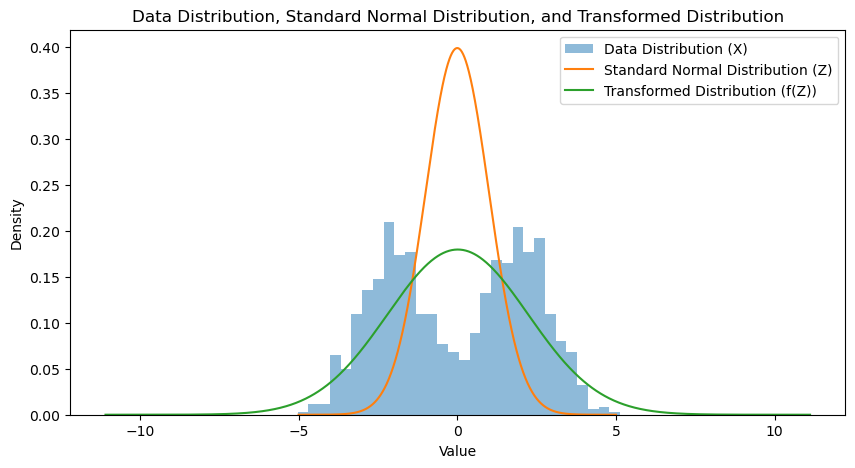

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

# Sample from a bimodal distribution: a mixture of two Gaussians
def bimodal_sample(n_samples=1000):
    samples1 = np.random.normal(loc=-2, scale=1, size=n_samples//2)
    samples2 = np.random.normal(loc=2, scale=1, size=n_samples//2)
    return np.concatenate([samples1, samples2])

# Define the transformation f and its inverse f_inv
def f(z, a, b):
    return a * z + b

def f_inv(x, a, b):
    return (x - b) / a

# Define the negative log likelihood function
def negative_log_likelihood(params, x):
    a, b = params
    z = f_inv(x, a, b)
    log_pz = norm.logpdf(z)  # log p_Z(f^{-1}(x))
    log_det = np.log(np.abs(1.0 / a))  # log |det df^{-1}/dx|
    return -np.sum(log_pz + log_det)

# Sample data from the bimodal distribution
x = bimodal_sample(1000)

# Optimize the parameters a and b
initial_params = [1.0, 0.0]
result = minimize(negative_log_likelihood, initial_params, args=(x,))
a_opt, b_opt = result.x

# Display results
print(f'Optimized parameters: a = {a_opt}, b = {b_opt}')

# Plotting the distributions
z = np.linspace(-5, 5, 1000)
x_transformed = f(z, a_opt, b_opt)

# Computing the density function p_X(x)
p_X = norm.pdf(f_inv(x_transformed, a_opt, b_opt)) * np.abs(1.0 / a_opt)

plt.figure(figsize=(10, 5))
plt.hist(x, bins=30, density=True, alpha=0.5, label='Data Distribution (X)')
plt.plot(z, norm.pdf(z), label='Standard Normal Distribution (Z)')
plt.plot(x_transformed, p_X, label='Transformed Distribution (f(Z))')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Data Distribution, Standard Normal Distribution, and Transformed Distribution')
plt.show()

As shown, this class of transformation (i.e. Affine) is not expressive enough to show the transformation of such changes